In [17]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc

import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from scipy.io import loadmat

## Directory

In [19]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/'

## Read individual synapse files (spots.txt), and manual annotations made in Matlab

In [20]:
spots={"filename":[]}

path = os.path.dirname(expdir)  
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    #print(str(i+1)+'out of '+str(len(filelist)))
    if filelist[i].endswith(".txt"): 
        if ("analyse" in str(filelist[i]))==True:
            if ("_spot" in str(filelist[i]))==True:
                     #if ("backup" in str(filelist[i]))==False:
                        #if str(filelist[i][:-12]) not in str(spots["filename"]):
                            spots["filename"].append(filelist[i])

In [13]:
spots["filename"][24800]

'/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/NoSecondary_synapsesclicked_analyse/N3/stacked__725_CRTL_HPN17DIV_Phalloidin-AF405_Homer-gp-AF488_NON-rbt-AF594_VGLUT1-Star635P_PFA_series9_0_spots25.txt'

In [21]:
len(spots["filename"])

24555

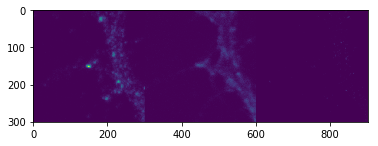

In [14]:
spot=np.asarray(np.loadtxt(spotname,delimiter=','))
plt.imshow(spot)

In [15]:
spot.shape

(301, 903)

In [9]:
imagename=str.join('_',spotname.split('_')[:-2])+'.tif'
matname=str.join('_',spotname.split('_')[:-2])+'.mat'
image=pims.open(imagename)

In [11]:
from scipy.io import loadmat
pos1 = loadmat(matname)['pos1'][0]
orangex = loadmat(matname)['orangex'][0]
orangey = loadmat(matname)['orangey'][0]
small_movi=loadmat(matname)['small_movi']

In [33]:
small_movii=image[8][pos1[0]-1:pos1[1],pos1[2]-1:pos1[3]]

In [ ]:
ecm_image=full_image[3] #channel of changing protein (need to subtract 1)
    syt_image=full_image[1]

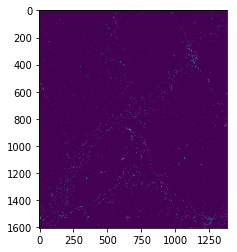

In [52]:
syt_image=image[1]
small_movi_syt=syt_image[pos1[0]-1:pos1[1],pos1[2]-1:pos1[3]]
plt.imshow(small_movi_syt)

In [60]:
spotcut=small_movi_syt[np.int(np.round(orangex[1]-150)):np.int(np.round(orangex[1]+151)),
                                                    np.int(np.round(orangey[1]-150)):np.int(np.round(orangey[1]+151))]

In [105]:
spotname

'/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV/SYT1/Calreticulin/stacked__055_HPN20DIV_Phalloidin-AF405_Homer-gp-seq-AF488_Calreticulin-rbt-AF594_Synaptotagmin1-Atto647N_PFA_series9_0_spots2.txt'

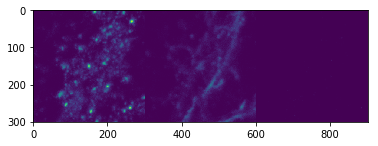

In [62]:
plt.imshow(spot)

In [68]:
a=np.concatenate([spot,spotcut],axis=1)

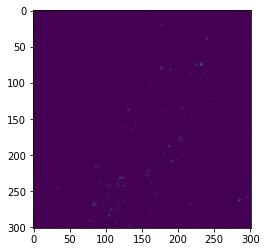

In [75]:
plt.imshow(a[:,600:901])

In [83]:
spotname.split('.txt')[0]+'_rerun.txt'

'/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/N1_HPN20DIV/SYT1/Calreticulin/stacked__055_HPN20DIV_Phalloidin-AF405_Homer-gp-seq-AF488_Calreticulin-rbt-AF594_Synaptotagmin1-Atto647N_PFA_series9_0_spots2_rerun.txt'

In [79]:
spotname.split('spots')[-1].split('.')[0]

'2'

In [18]:
for i in range(0,len(spots["filename"])):
    print('spot '+str(i+1)+' out of '+str(len(spots["filename"])))
    spotname=spots["filename"][i]
    spot=np.asarray(np.loadtxt(spotname,delimiter=','))
    imagename=str.join('_',spotname.split('_')[:-2])+'.tif'
    matname=str.join('_',spotname.split('_')[:-2])+'.mat'
    image=pims.open(imagename)
    pos1 = loadmat(matname)['pos1'][0]
    orangex = loadmat(matname)['orangex'][0]
    orangey = loadmat(matname)['orangey'][0]
    small_movi=loadmat(matname)['small_movi']
    
    syt_image=image[1]
    small_movi_syt=syt_image[pos1[0]-1:pos1[1],pos1[2]-1:pos1[3]]
    
    spotnumber=spotname.split('spots')[-1].split('.')[0]
    
    spotcut=small_movi_syt[np.int(np.round(orangex[np.int(spotnumber)-1]-151)):
                           np.int(np.round(orangex[np.int(spotnumber)-1]+150)),
                           np.int(np.round(orangey[np.int(spotnumber)-1]-151)):
                           np.int(np.round(orangey[np.int(spotnumber)-1]+150))]
    a=np.concatenate([spot,spotcut],axis=1)
    np.savetxt(spotname.split('.txt')[0]+'_rerun.txt',a)

spot 1 out of 24874


KeyboardInterrupt: 

In [89]:
np.int(spotnumber)

2